In [1]:
import os
import numpy as np
import pandas as pd
import pylab as pl
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

In [2]:
station_label = pd.read_csv('clean_data/station_label.csv')
traffic_volume = pd.read_csv('clean_data/traffic_volume.csv')

In [3]:
station_label.head()

,station_id,empytCount_0,empytCount_1,empytCount_2,empytCount_3,empytCount_4,empytCount_5,empytCount_6,empytCount_7,empytCount_8,...,startCount_22,endCount_22,startCount_23,endCount_23,label,capacity,lat,lon,name,short_name
0,301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1018.0,2228.0,701.0,1428.0,1,37,40.722174,-73.983688,E 2 St & Avenue B,5515.02
1,445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1164.0,3341.0,1105.0,2287.0,1,52,40.727408,-73.981420,E 10 St & Avenue A,5659.05
2,487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,931.0,2288.0,511.0,1403.0,1,34,40.733143,-73.975739,E 20 St & FDR Drive,5886.02
3,504,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2145.0,2749.0,1666.0,1780.0,1,44,40.732219,-73.981656,1 Ave & E 16 St,5779.08
4,72,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,800.0,1224.0,565.0,653.0,2,39,40.767272,-73.993929,W 52 St & 11 Ave,6926.01


In [4]:
station_type_feature = station_label.groupby('label').mean().drop(columns=['station_id', 'lat', 'lon', 'capacity'])

In [5]:
station_type_feature.head()

,empytCount_0,empytCount_1,empytCount_2,empytCount_3,empytCount_4,empytCount_5,empytCount_6,empytCount_7,empytCount_8,empytCount_9,...,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23
label,,,,,,,,,,,,,,,,,,,,,
0,11.726154,11.384615,11.784615,12.221538,6.698462,3.713846,8.501538,9.104615,10.058462,7.387692,...,345.836923,458.403077,251.609231,328.387692,180.363077,237.375385,136.960000,187.015385,95.541538,134.738462
1,3.481481,3.537037,5.055556,4.666667,4.296296,3.981481,5.166667,3.055556,1.240741,2.351852,...,3658.407407,4403.962963,2642.500000,3110.500000,2006.092593,2253.888889,1560.703704,1732.814815,1074.796296,1162.111111
2,5.536585,6.475610,7.756098,8.804878,10.060976,12.000000,20.463415,8.963415,5.548780,1.731707,...,2615.890244,2732.536585,1799.268293,1838.487805,1260.048780,1259.012195,946.353659,911.670732,606.719512,607.475610
3,11.084507,11.150235,10.009390,11.699531,8.849765,10.042254,11.056338,7.164319,4.558685,2.896714,...,1180.103286,1384.474178,811.990610,939.737089,578.389671,654.967136,434.600939,483.596244,285.061033,331.521127
4,47.600000,51.020000,52.160000,43.460000,35.960000,40.340000,57.480000,41.560000,15.720000,10.040000,...,2109.220000,1823.180000,1247.560000,1093.300000,787.240000,711.300000,550.080000,509.560000,371.040000,356.700000


In [6]:
def normalize(rawList):
    return([i/sum(rawList) for i in rawList])

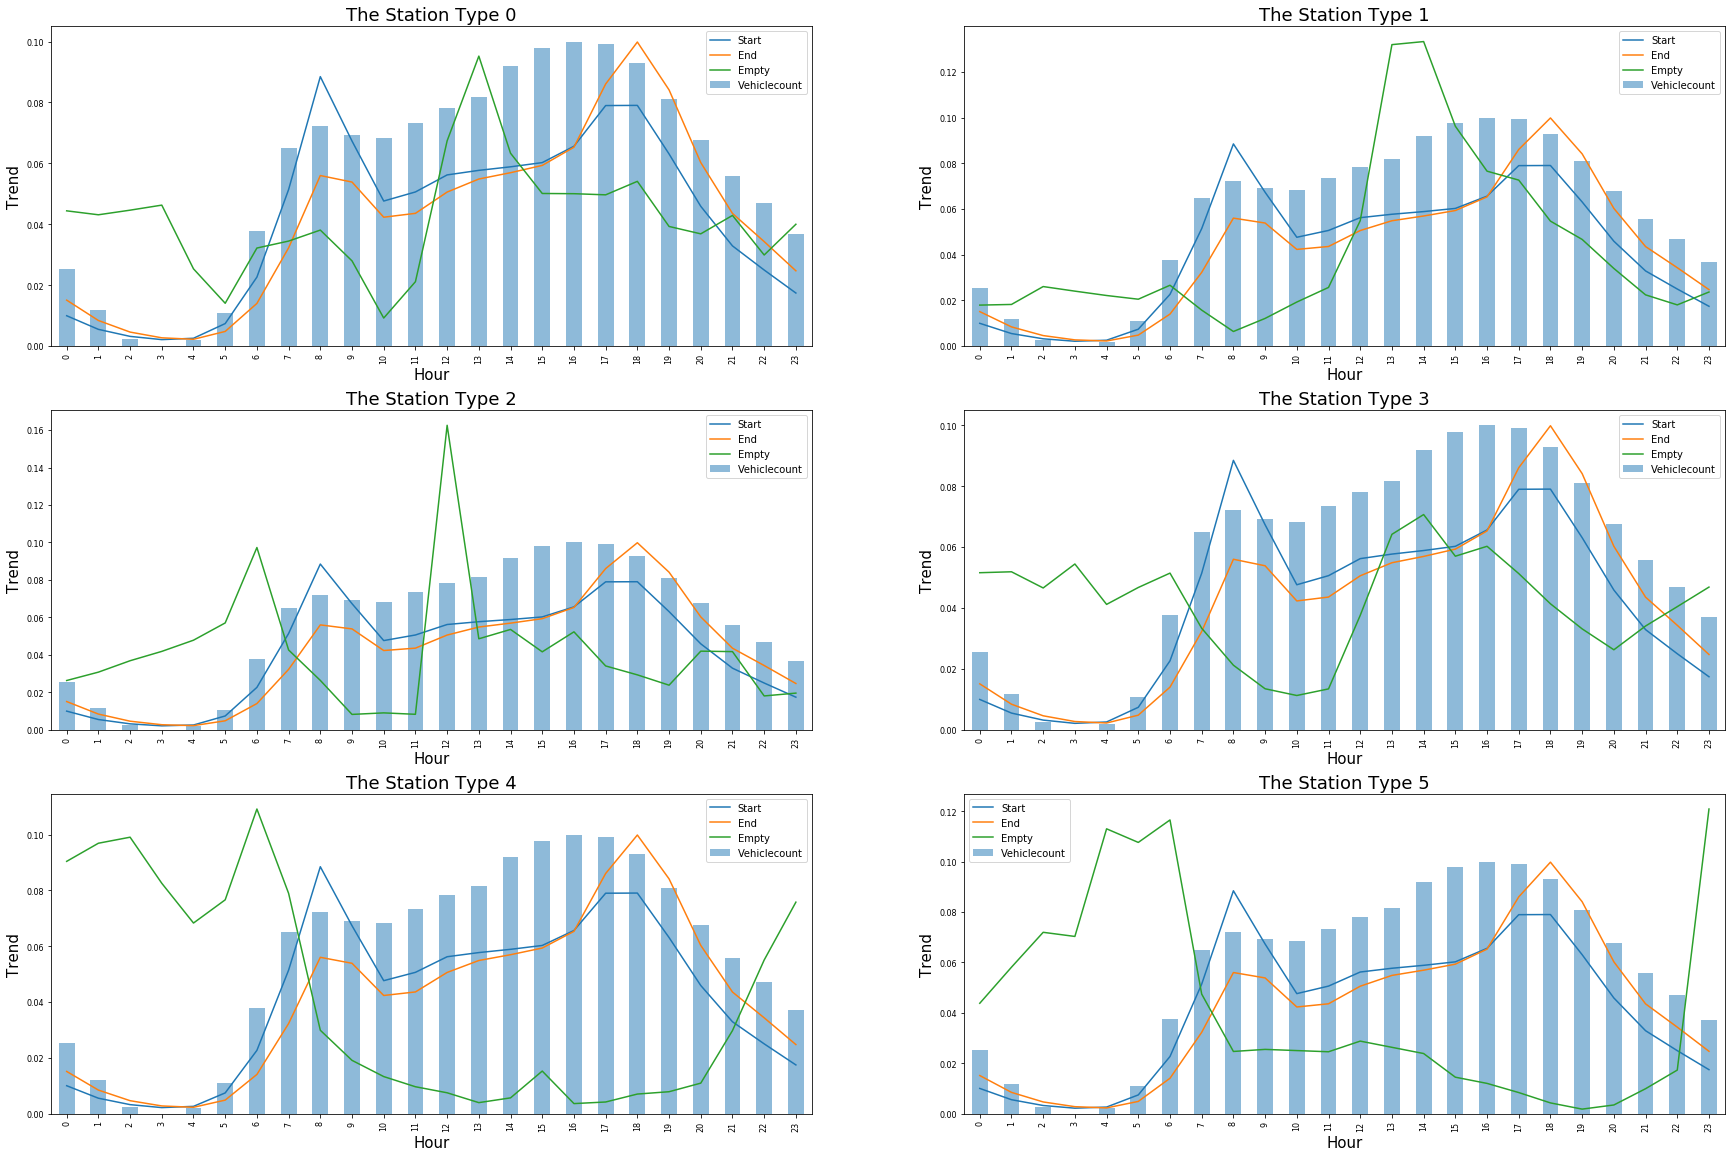

In [12]:
dailyRange = range(0,24)
scaler = MinMaxScaler(feature_range=(0, 0.1))

fig = pl.figure(figsize=(30,20))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    ax.set_title("The Station Type " + str(i),fontsize=18)
    pl.xticks(fontsize=8)
    pl.yticks(fontsize=8)
    pl.xlabel("Hour",fontsize=15)
    pl.ylabel("Trend",fontsize=15)
    
    ax.plot(dailyRange, normalize(list(station_type_feature.iloc[0][24:72:2])), label="Start")
    ax.plot(dailyRange, normalize(list(station_type_feature.iloc[0][25:72:2])), label="End")
    ax.plot(dailyRange, normalize(list(station_type_feature.iloc[i][0:24])), label="Empty")
    pd.DataFrame(scaler.fit_transform(traffic_volume))[0].plot(x=dailyRange,kind="bar", alpha=0.5, label="Vehiclecount", ax = ax)
    
    #pl.xticks(rotation=70)
    pl.legend()

此图用来看趋势。Norm是对该类型站点各个时间的start/end/empty数据进行处理，反应的是本类型站点在不同时间段的趋势。因为norm后，和各个站点实际start end数量无关。

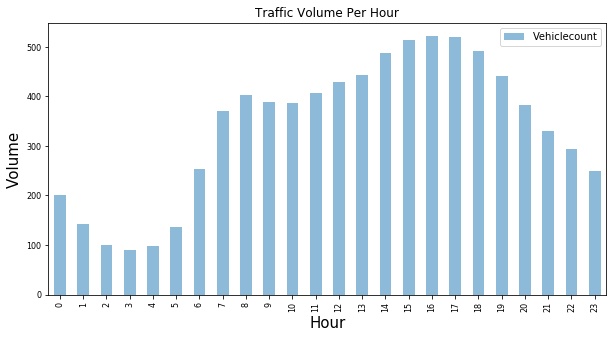

In [13]:
dailyRange = range(0,24)

fig = pl.figure(figsize=(10,5))

ax = fig.add_subplot(1,1,1)
ax.set_title("Traffic Volume Per Hour")
pl.xticks(fontsize=8)
pl.yticks(fontsize=8)
pl.xlabel("Hour",fontsize=15)
pl.ylabel("Volume",fontsize=15)

traffic_volume.Traffic_Volume.plot(x=dailyRange,kind="bar", alpha=0.5, label="Vehiclecount", ax = ax)

#pl.xticks(rotation=70)
pl.legend()

**start**

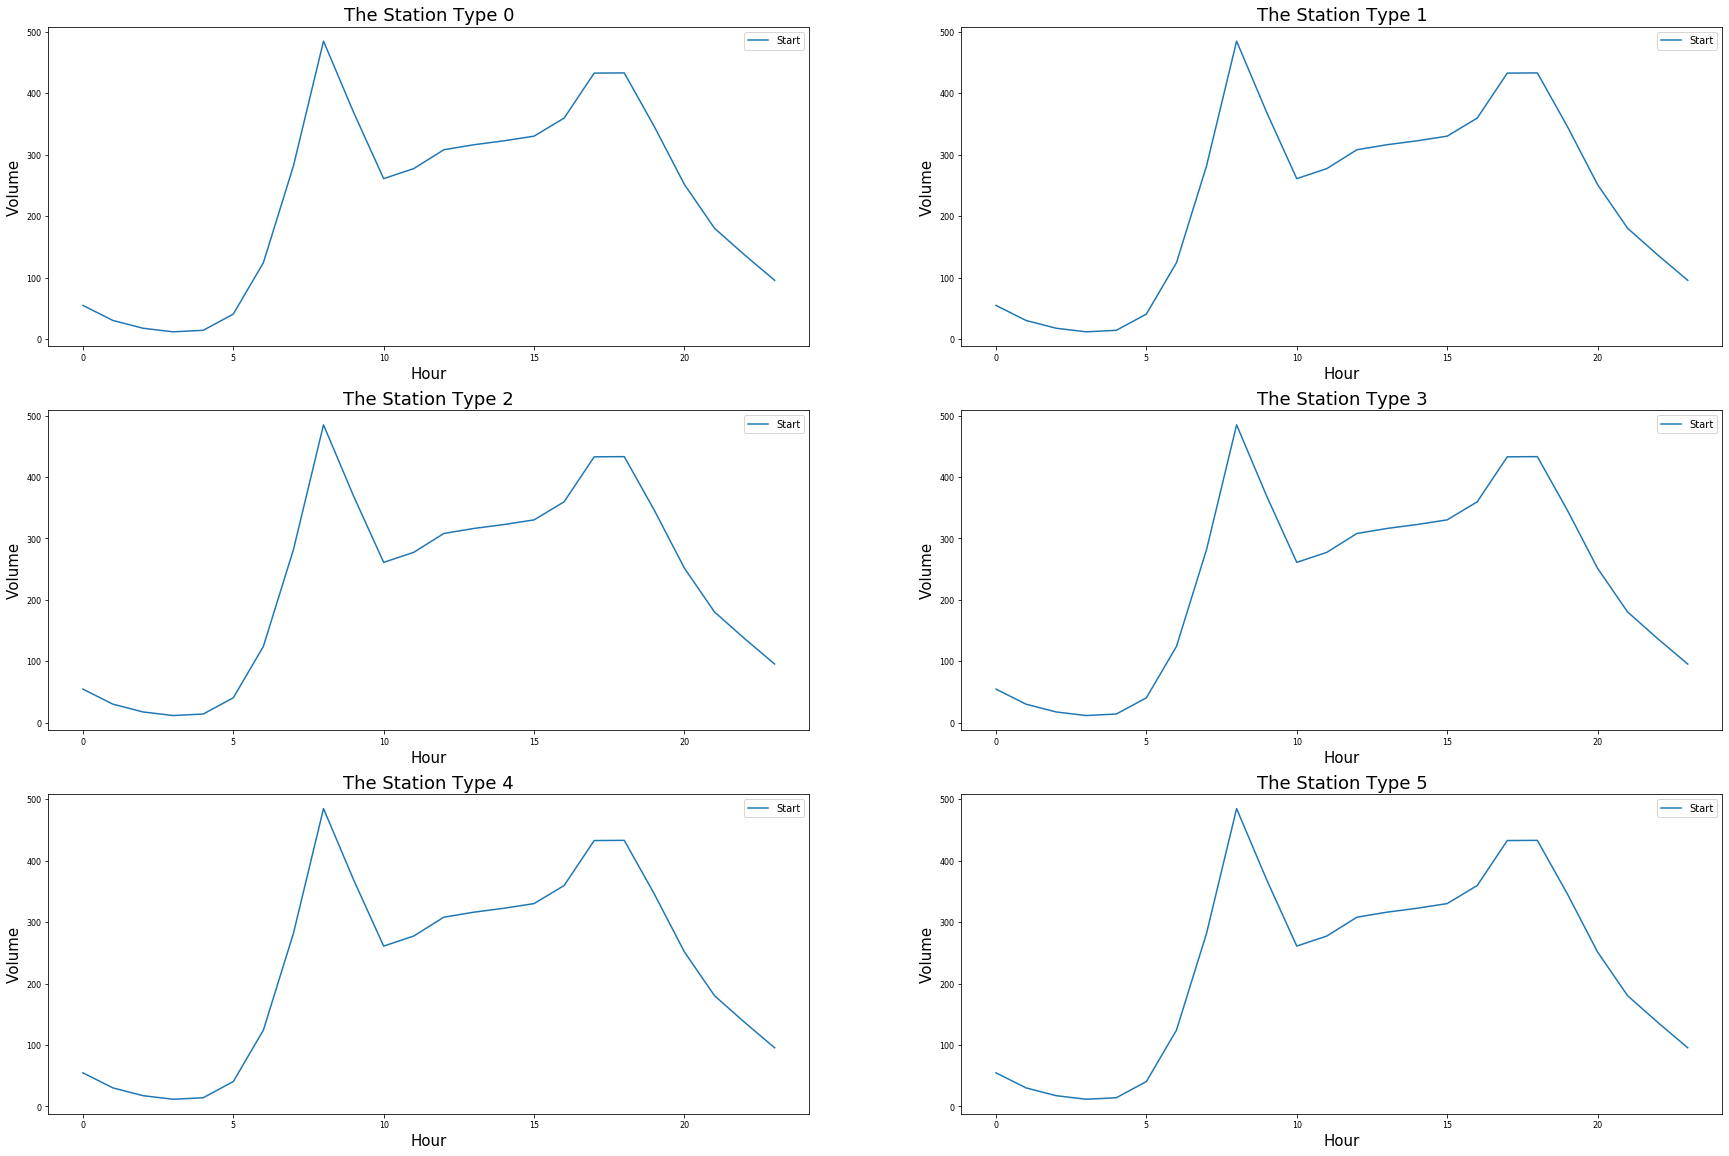

In [20]:
dailyRange = range(0,24)
fig = pl.figure(figsize=(30,20))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    ax.set_title("The Station Type " + str(i),fontsize=18)
    pl.xticks(fontsize=8)
    pl.yticks(fontsize=8)
    pl.xlabel("Hour",fontsize=15)
    pl.ylabel("Volume",fontsize=15)
    
    ax.plot(dailyRange, list(station_type_feature.iloc[0][24:72:2]), label="Start")
    
    pl.legend()

**End**

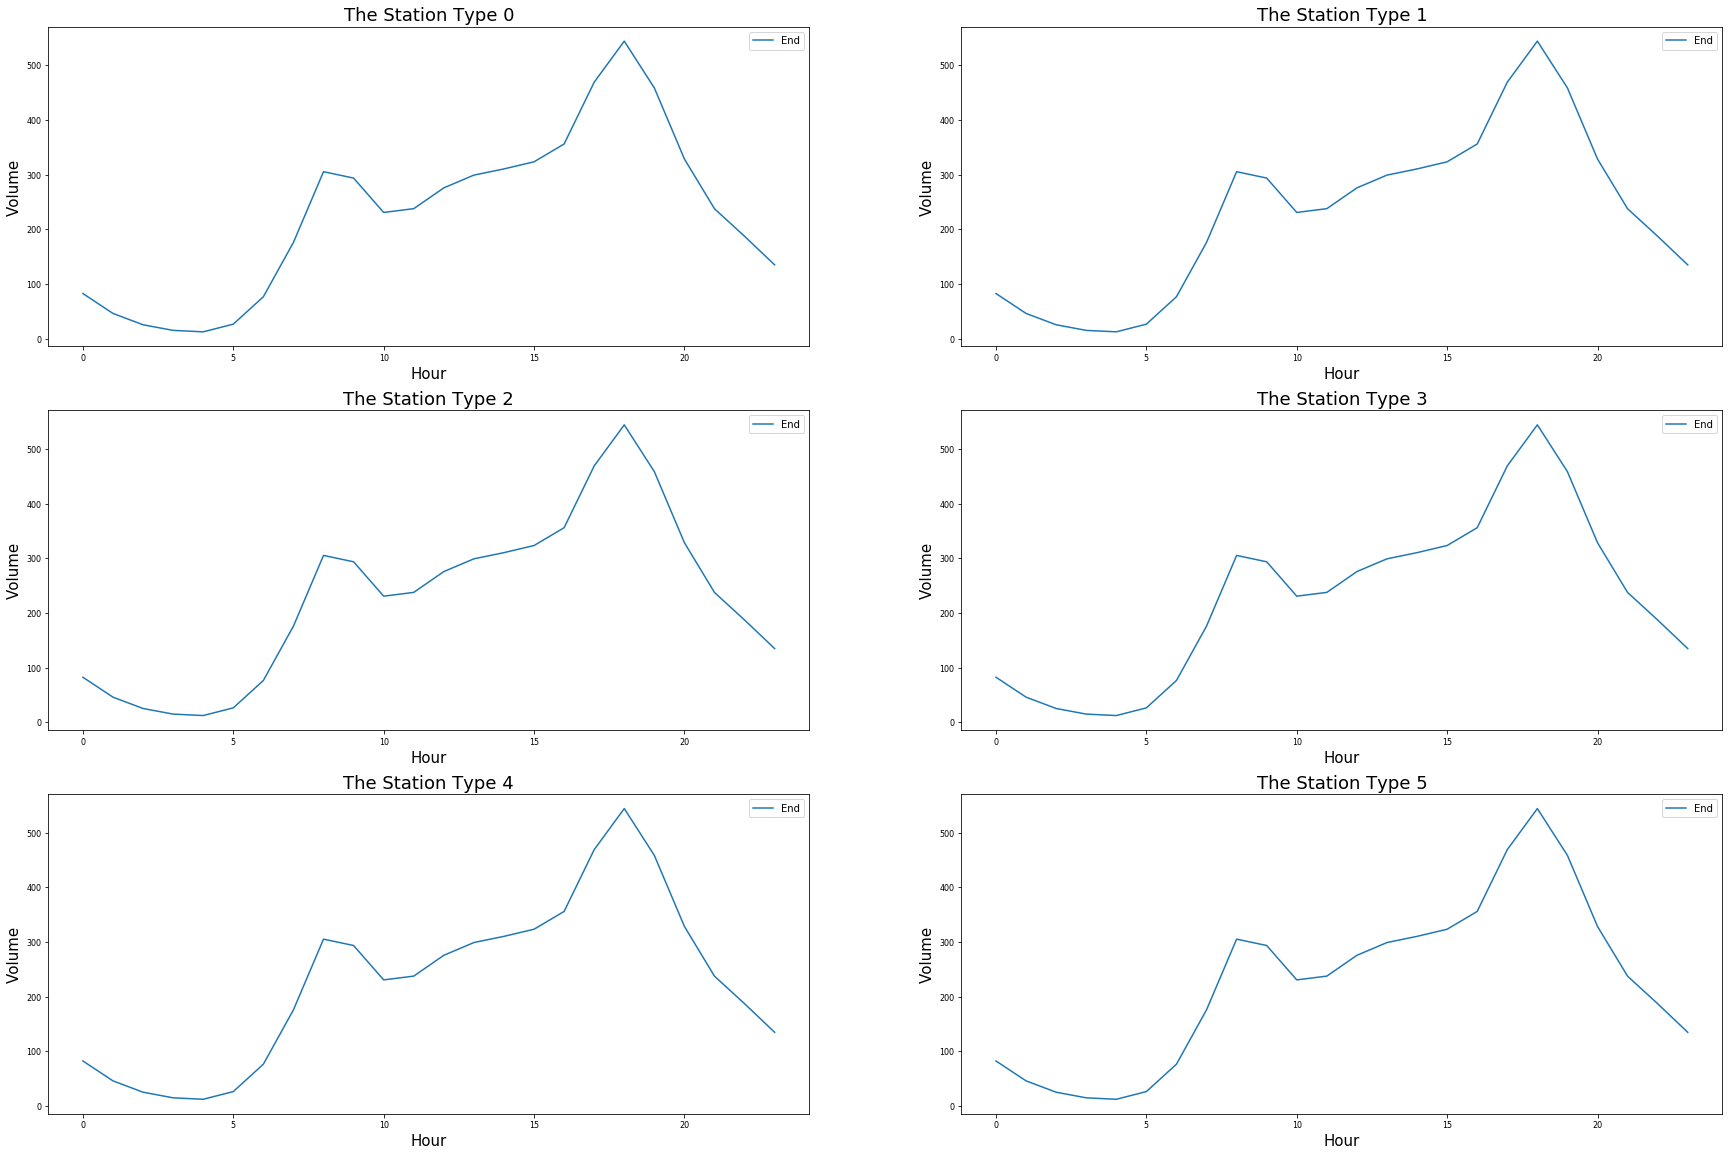

In [21]:
dailyRange = range(0,24)
fig = pl.figure(figsize=(30,20))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    ax.set_title("The Station Type " + str(i),fontsize=18)
    pl.xticks(fontsize=8)
    pl.yticks(fontsize=8)
    pl.xlabel("Hour",fontsize=15)
    pl.ylabel("Volume",fontsize=15)
    
    ax.plot(dailyRange, list(station_type_feature.iloc[0][25:72:2]), label="End")
    
    pl.legend()

**Empty**

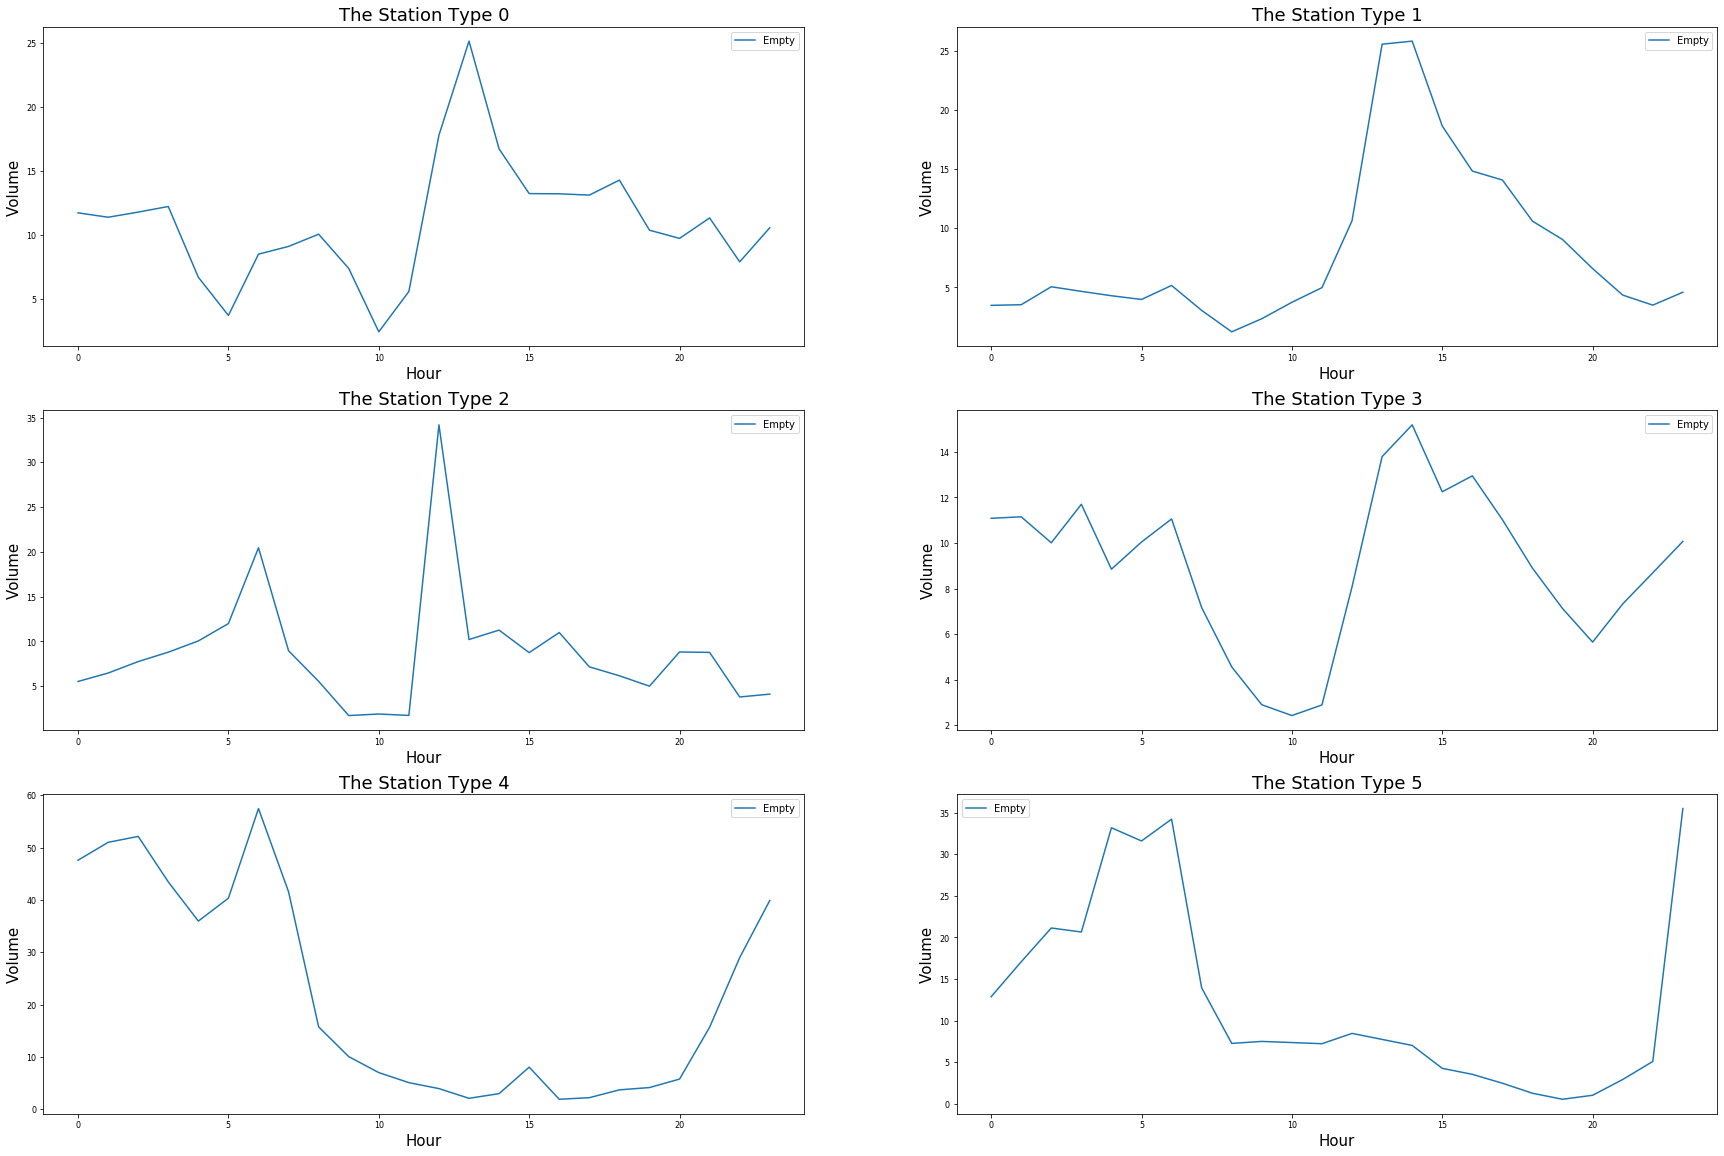

In [22]:
dailyRange = range(0,24)
fig = pl.figure(figsize=(30,20))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    ax.set_title("The Station Type " + str(i),fontsize=18)
    pl.xticks(fontsize=8)
    pl.yticks(fontsize=8)
    pl.xlabel("Hour",fontsize=15)
    pl.ylabel("Volume",fontsize=15)

    ax.plot(dailyRange, list(station_type_feature.iloc[i][0:24]), label="Empty")
    
    pl.legend()